# Data Analysis - Velib Project in [Python](https://www.python.org/) <a href="https://www.python.org/"><img src="https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/community/logos/python-logo-only.png" style="max-width: 35px; display: inline" alt="Python"/></a>&nbsp;

---
_Authors:_ Tom Brusseaux, Maïmouna Gadji,Natael Régnier, Tidiane Sall

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
loading = pd.read_csv("velibLoading.csv",sep=" ")
loading.head()

  
coord =pd.read_csv("velibCoord.csv", sep=" ")
coord.head()
print(coord.shape)

(1189, 4)


##### <span style="color:purple"> On vérifie que il n'y ait pas de données manquantes ou dupliquées dans le dataset </span>

In [3]:
print("Cellules vides")
print('--- Loading ---')
A=loading.isna().sum().sort_values(ascending=False)
print(A.sum())
print('--- Coord ---')
B= coord.isna().sum().sort_values(ascending=False)
print(B.sum())

print("\n Données dupliquées")
print('--- Loading ---')
A=loading.duplicated().sum()
print(A)
print('--- Coord ---')
B=loading.duplicated().sum()
print(B)

Cellules vides
--- Loading ---
0
--- Coord ---
0

 Données dupliquées
--- Loading ---
0
--- Coord ---
0


##### <span style>Visiblement il y a 0 cellule vide dans le dataset et pas de données dupliquées </span>








##### <span style="color:red"> On vérifie la possibilité d'avoir plusieurs fois une station </span>

In [4]:
# Stations in descending order of occurrence
station_names = coord.names.value_counts().sort_values(ascending=False)

L=station_names[station_names>1]
print(L)

# --- #
print('')

# We display the station with the most occurrences, i.e. the station corresponding to the first line of 'station_name'.
nom = station_names.index[0]
coord[coord.names == nom]





 PORTE DES LILAS          3
 GARE D'AUSTERLITZ        3
 GARE DE L'EST            2
 AQUEDUC                  2
 DODU                     2
 PORTE DE SAINT OUEN      2
 SAINT AUGUSTIN           2
 RICHARD LENOIR           2
 FRANCE (LEVALLOIS)       2
 BELLEVILLE               2
 PORT ROYAL               2
 PARC DE BELLEVILLE       2
 WILSON (LEVALLOIS)       2
 SAINT HONORE             2
 SAINT MARCEL             2
 ALEXANDRE DUMAS          2
 PORTE DE BAGNOLET        2
 LACEPEDE                 2
 CHERCHE MIDI             2
 LEGENDRE                 2
 BROCHANT                 2
 JOURDAIN                 2
 BASTILLE                 2
 BOURSE DU TRAVAIL        2
 CLICHY                   2
 FAURE (AUBERVILLIERS)    2
Name: names, dtype: int64



,longitude,latitude,bonus,names
362,2.404770,48.876604,1,PORTE DES LILAS
450,2.405960,48.875412,1,PORTE DES LILAS
957,2.411046,48.878099,1,PORTE DES LILAS


In [5]:
# Check if a station appears more than once
station_names = coord['names'].value_counts()
duplicate_stations = station_names[station_names > 1].index.tolist()

# Iterate through duplicate stations and remove duplicates
for station in duplicate_stations:
    indices = coord[coord['names'] == station].index
    coord.drop(indices[1:], inplace=True)
    loading.drop(indices[1:], inplace=True)

print(loading.shape)


(1161, 168)


In [6]:
# Stations in descending order of occurrence
station_names = coord.names.value_counts().sort_values(ascending=False)

# --- #
print('')

# We display the station with the most occurrences, i.e. the station corresponding to the first line of 'station_name'.
nom = station_names.index[0]
coord[coord.names == nom]

,longitude,latitude,bonus,names
1,2.377389,48.8863,0,EURYALE DEHAYNIN


##### <span style>Il peut donc y a voir plusieurs parking de vélo présents à une localisation.</span>

# Etude préliminaire : analyse descriptive


##### <span style="color:brown"> On vérifie les données de 16 stations diffèrentes séparées par jour de la semaine </span>

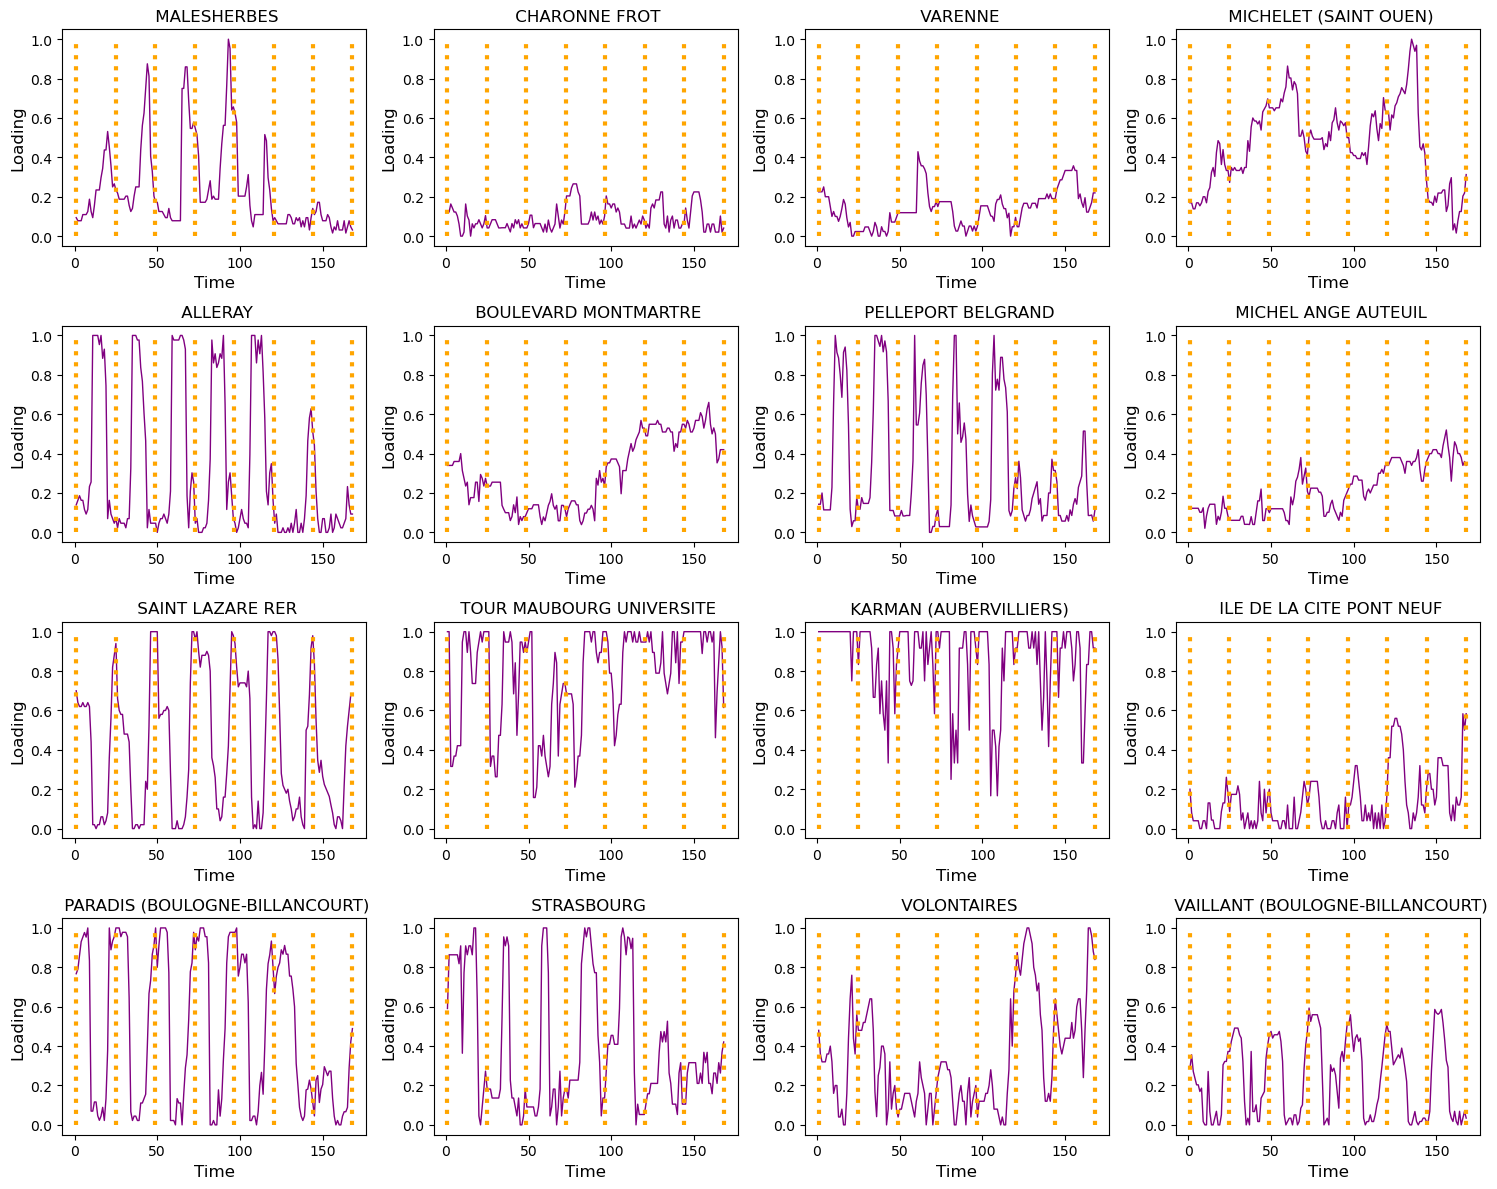

In [7]:
stations = np.arange(loading.shape[0])
rd.shuffle(stations)
stations = stations[:16] 

n_steps    = loading.shape[1]  # number of observed time steps
time_range = np.linspace(1, n_steps, n_steps)  # observed time range
time_tick  = np.linspace(1, n_steps, 8)  # beginning of days

# --- #

fig, axs = plt.subplots(4, 4, figsize = (15,12))

for i in range(4):
    for j in range(4):
        k_station = stations[4 * i + j]
        axs[i, j].plot(time_range, loading.loc[k_station, :], linewidth = 1, color = 'purple')
        axs[i, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange", linestyle = "dotted", linewidth = 3)
        axs[i, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

<span style>On constate diffèrents types de distribution des données. On remarque une periodicité d'un jour pour la plupart des stations.
Pour certaines stations il y a une différence notable entre le chargement pendant les jours de semaines et ceux du week-end
Pour finir les vélos ont tendance à être moins emprunté durant les heures tardives (0h-4h) avec des chargement plus élevés.
Il y a également des diffèrences entre les profil de chargement de certaines villes.
</span>

##### <span style="color:brown">Pour confirmer les tendances journalières on trace maintenant un boxplot de toutes les données organisés par heures ainsi que le chargement selon le jour de la semaine</span>

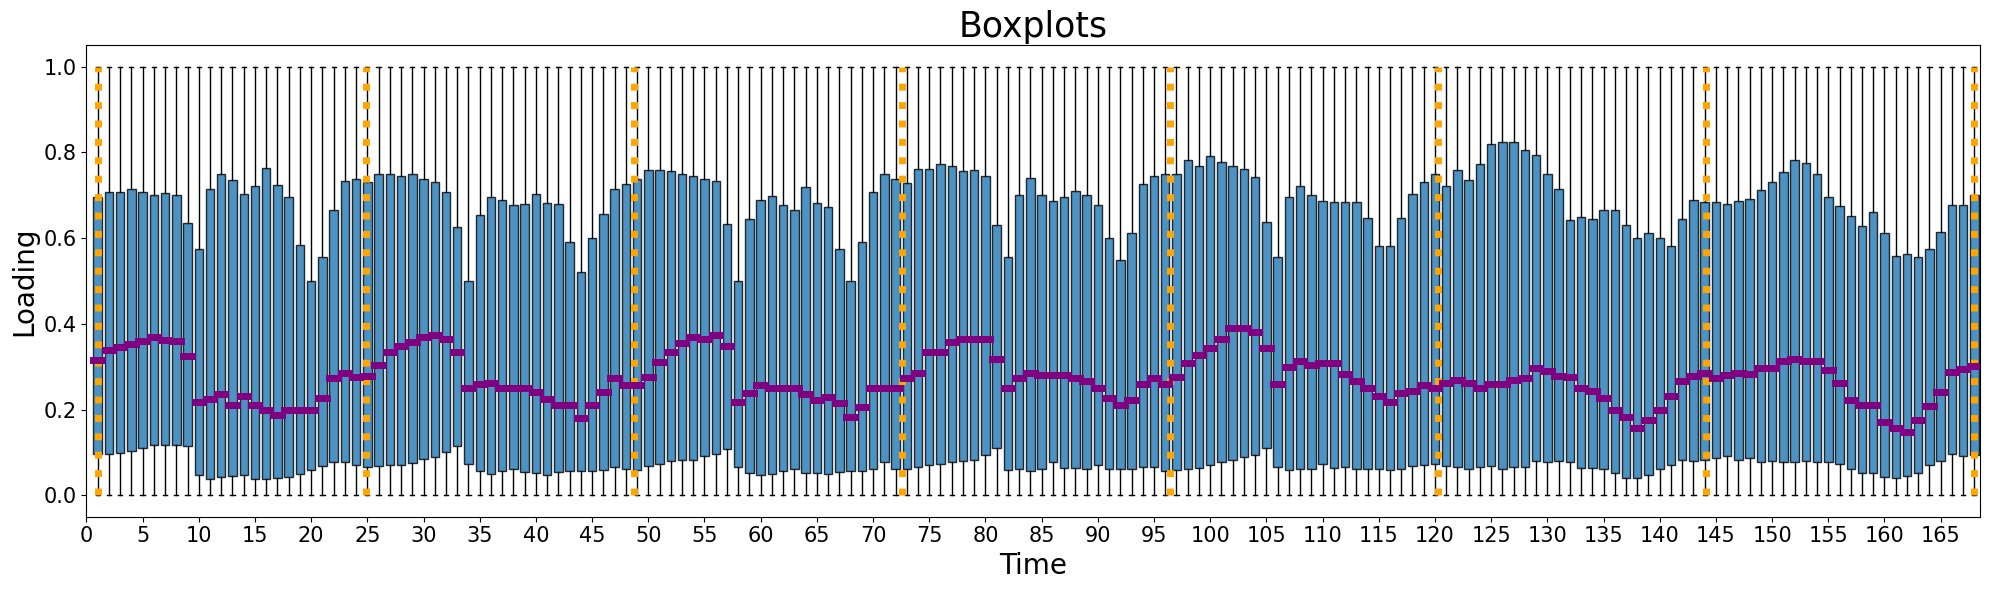

In [8]:
plt.figure(figsize = (20,6))

# --- #

bp = plt.boxplot(loading, widths = 0.75, patch_artist = True)


for box in bp['boxes']:
    box.set_alpha(0.8)
    
for median in bp['medians']:
    median.set(color = "Purple", linewidth=5)
    
# --- #
    
plt.vlines(x = time_tick, ymin = 0, ymax = 1, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

# --- #

plt.xlabel('Time', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.title("Boxplots", fontsize = 25)
plt.xticks(ticks = np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

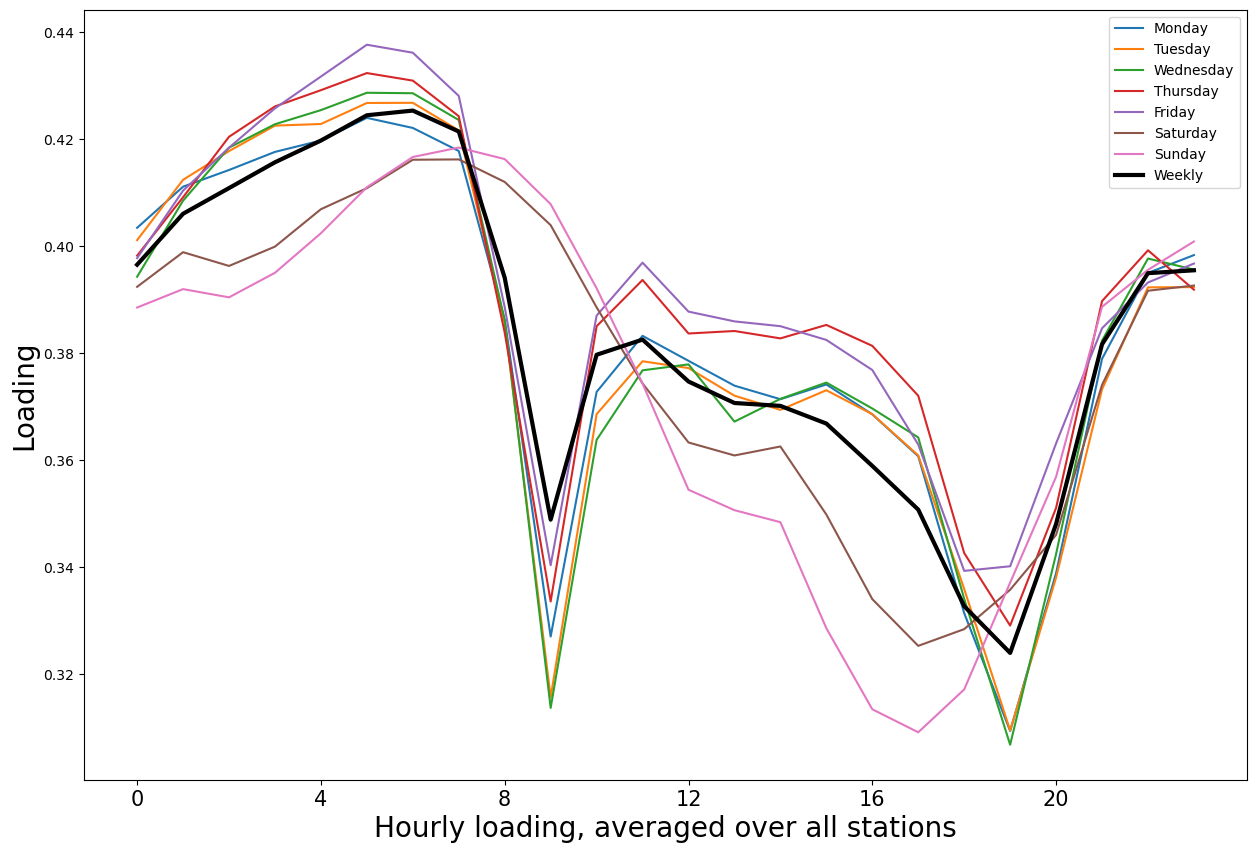

In [9]:
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #

days = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (15,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Hourly loading, averaged over all stations', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.legend(days + ['Weekly'])
plt.xticks(ticks = np.arange(0,24,4), labels=np.arange(0,24,4), fontsize = 15)
  
plt.tight_layout
plt.show()

##### <span >Les boxplots et les coubes confirment la périodicité journalière du chargement.Les stations sont moins chargées la semaine et durant la nuit. On observe une similarité entre les courbes des jours ouvrés d'une part ,et entre celles du week-end d'autre part. On remarque que pendant les jours de la semaines, les emprunts se font plus en début de journées vers 8h et en début de soirée vers 19h.On peut donc supposer qu'il s'agit des heures où les usagers vont et reviennent de leur travail.Alors qu'ils sont plus fréquents vers la fin d'aprés midi(17h) pendant les week-ends.On peut là supposer qu'il s'agit des heures habituels de promenande </span>

##### <span style="color:brown">On va désormais voir l'influence de la répartition géographique</span>

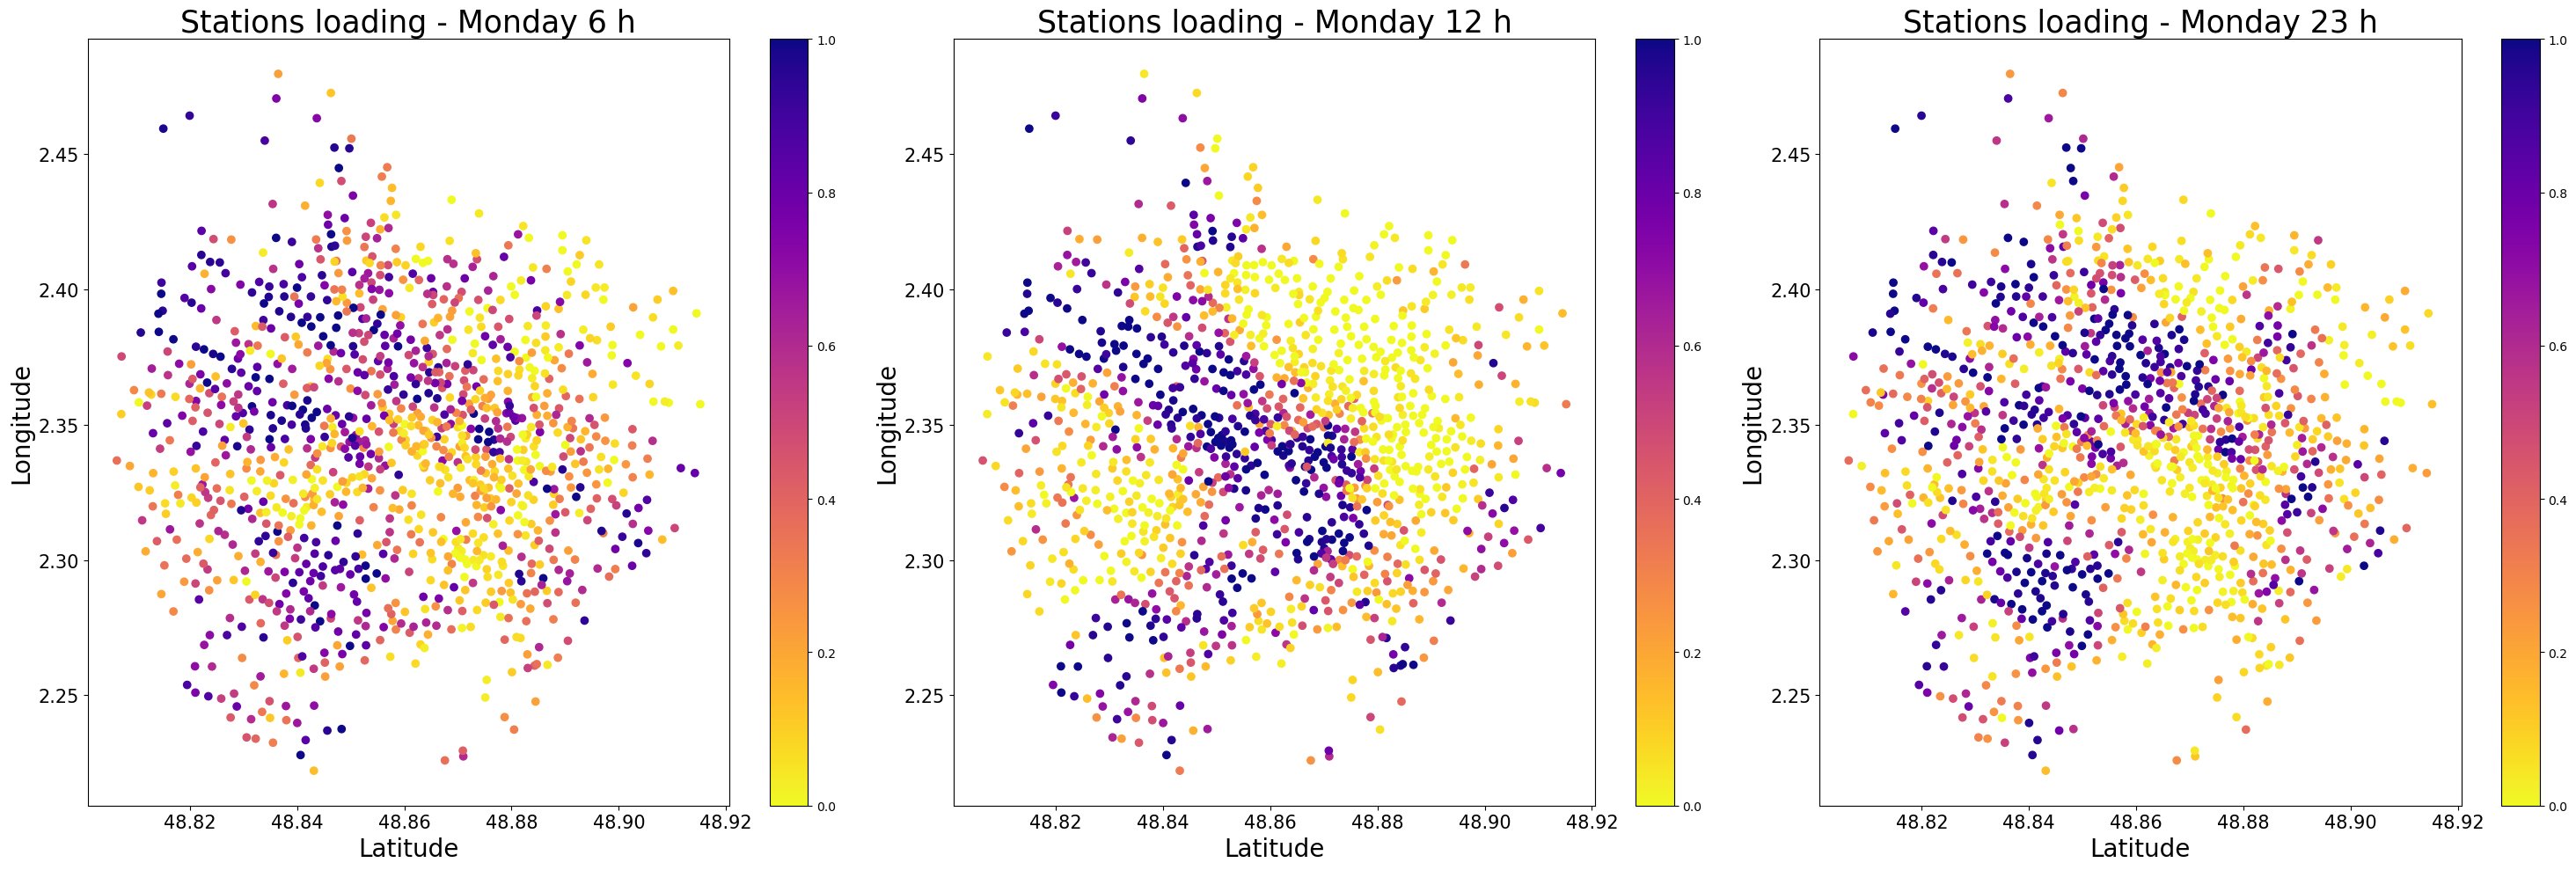

In [10]:
hours=[6,12,18]
## Simple 2D representation
# Monday at 6h, 12h and 23h

hours = [6, 12, 23]

# --- #

s, n = 10, len(hours)
fig, axs = plt.subplots(1, n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(x=coord.latitude, y=coord.longitude, c = loading.iloc[:,h], cmap = cm.plasma_r)
    axs[i].set_title('Stations loading - Monday {} h'.format(h), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

### On constate un chargement plus élevé en début de soirée à en périphérie de Paris.Puis le chargement devient plus élevé au centre de Paris en mi-journée avant de se déplacer en soirée encore en périphérie.

In [11]:
from sklearn.preprocessing import scale
loading_sc=scale(loading) #On réduit et on centre nos données

# I. ACP

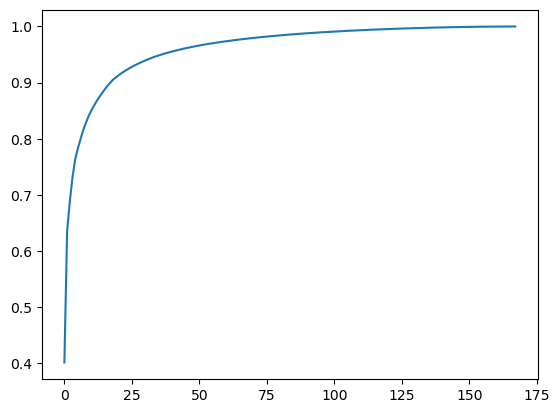

In [12]:
from sklearn.decomposition import PCA



pca=PCA()
pca.fit(loading_sc)
new_variables=pca.transform(loading_sc)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)


In [13]:
loading_reduced=new_variables[:,:25] #On décide de garder que 25 variables explicatives

##### On va garder 25 variables explicatives qui permettent d'expliquer 80%.

In [14]:
print('--- PCA ---')
print('Initial dimension:', loading.shape)
print('Dimension after projection:', loading_reduced.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% of the total variance')

--- PCA ---
Initial dimension: (1161, 168)
Dimension after projection: (1161, 25)

--- Explained variance ---
Component 1: 67.44 i.e. 40.11 % of the total variance
Component 2: 39.35 i.e. 23.4 % of the total variance


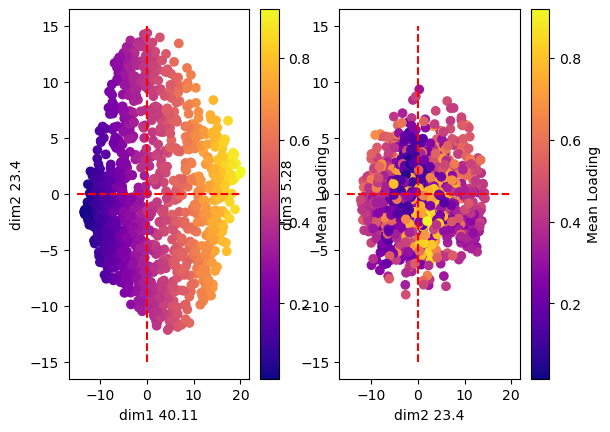

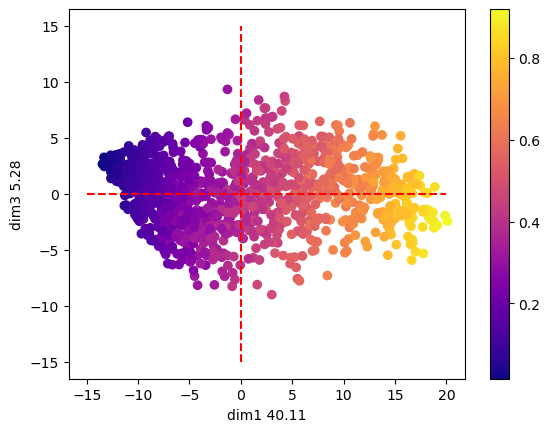

In [15]:

fig = plt.figure()
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])  # 1 ligne, 2 colonnes, largeur égale pour chaque colonne

ax1 = fig.add_subplot(gs[0, 0])
scatter1=ax1.scatter(loading_reduced[:,0],loading_reduced[:,1],c=loading.mean(axis=1),cmap='plasma')
ax1.hlines(y=0,xmin=-15,xmax=20,linestyle='dashed',color='red')
ax1.vlines(x=0,ymin=-15,ymax=15,linestyle='dashed',color='red')
plt.colorbar(scatter1, ax=ax1, label='Mean Loading')
ax1.set_xlabel('dim1 '+str(round(100*pca.explained_variance_ratio_[0],2)))
ax1.set_ylabel('dim2 '+str(round(100*pca.explained_variance_ratio_[1],2)))


ax2 = fig.add_subplot(gs[0, 1])
scatter2=ax2.scatter(loading_reduced[:,1],loading_reduced[:,2],c=loading.mean(axis=1),cmap='plasma')
ax2.hlines(y=0,xmin=-15,xmax=20,linestyle='dashed',color='red')
ax2.vlines(x=0,ymin=-15,ymax=15,linestyle='dashed',color='red')
plt.colorbar(scatter2, ax=ax2, label='Mean Loading')
ax2.set_xlabel('dim2 '+str(round(100*pca.explained_variance_ratio_[1],2)))
ax2.set_ylabel('dim3 '+str(round(100*pca.explained_variance_ratio_[2],2)))


plt.figure()
plt.scatter(loading_reduced[:,0],loading_reduced[:,2],c=loading.mean(axis=1),cmap='plasma')
plt.hlines(y=0,xmin=-15,xmax=20,linestyle='dashed',color='red')
plt.vlines(x=0,ymin=-15,ymax=15,linestyle='dashed',color='red')
plt.colorbar()
plt.xlabel('dim1 '+str(round(100*pca.explained_variance_ratio_[0],2)))
plt.ylabel('dim3 '+str(round(100*pca.explained_variance_ratio_[2],2)))

plt.subplots_adjust(wspace=1.5)

plt.show()



#### On constate que la dimension 1 qui explique à peu près 40% de la variance correspond au chargement moyen , les chargement les moins faibles sont corrélés négativement par rapport à la dimension.

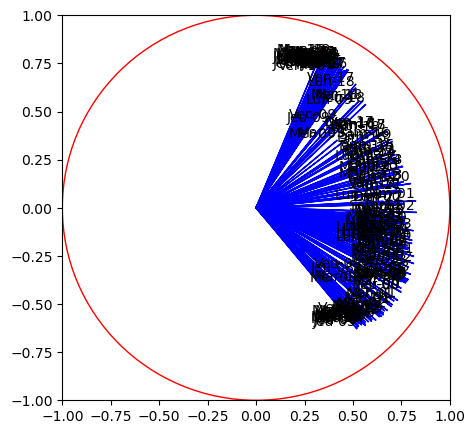

In [16]:
## coordonnées et représentation des variables


coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2,loading.columns):
     plt.text(i, j, nom,fontsize=10, ha='right', va='bottom')
     plt.arrow(0,0,i,j,color='blue')

plt.axis((-1,1,-1,1))
# cercle
c=plt.Circle((0,0), radius=1, color='red', fill=False)
ax.add_patch(c)
plt.show()

# II. KMEAN

In [21]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

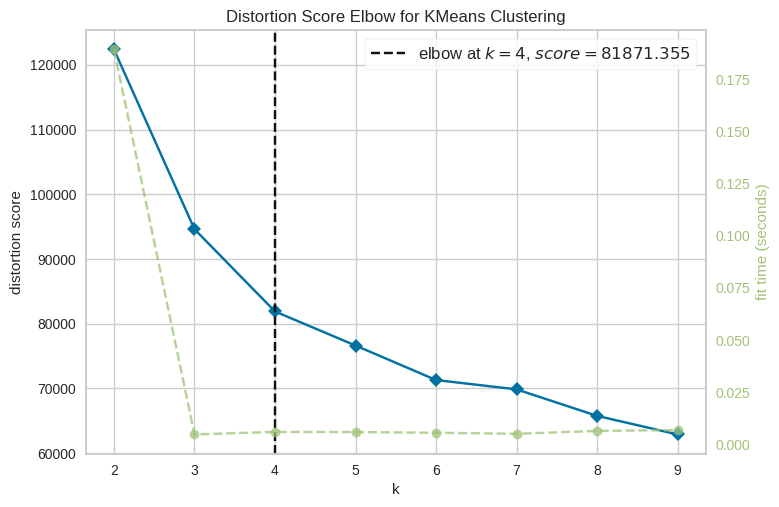

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
kmeans = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(loading_reduced)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

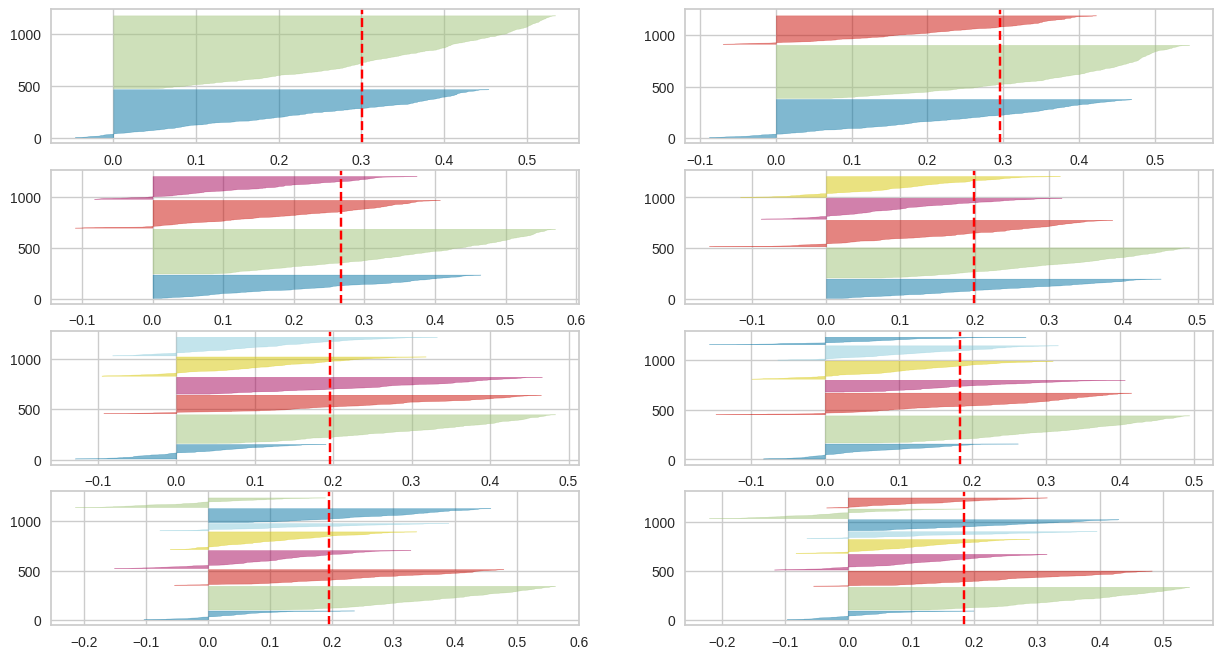

In [23]:
### TO BE COMPLETED ### 
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(loading_reduced)

### On trace les scores silhouette des donnée dans leur cluster en fonction du nombre de cluster. Le nombre de cluster 3 et le nombre de cluster 4 présentent des scores à peu près similaires selon les clusters et ne présentent pas un nombre de points à score négatif important. Grâce aux informations apportées par la méthode du coude, on décide de garder cluster. 

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


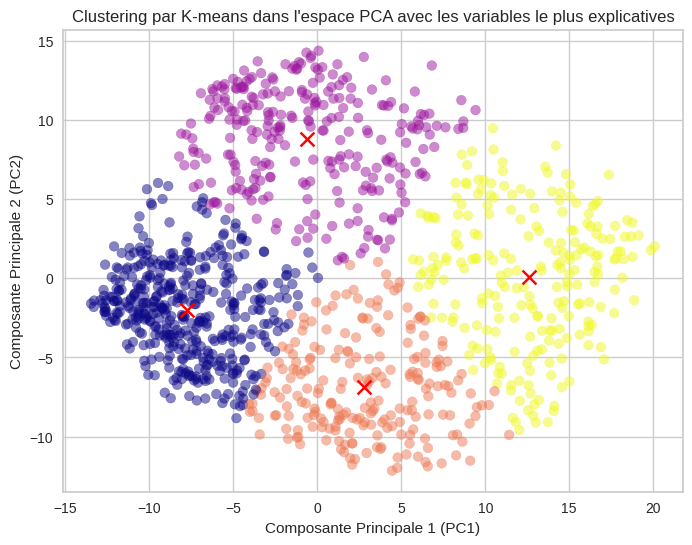

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)

cluster_km=kmeans.fit_predict(loading_reduced)
labels = kmeans.labels_

# Visualiser les clusters dans l'espace des composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(loading_reduced[:,0], loading_reduced[:,1], c=labels, cmap='plasma', alpha=0.5)  # Points de dispersion colorés par les clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')  # Centres des clusters
plt.title('Clustering par K-means dans l\'espace PCA avec les variables le plus explicatives')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.grid(True)
plt.show()    

#### On projette les points obtenus dans l'espace  formé des deux premières composantes principales.On constate une nette différence lorsque le nombre de cluster est de 4.

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


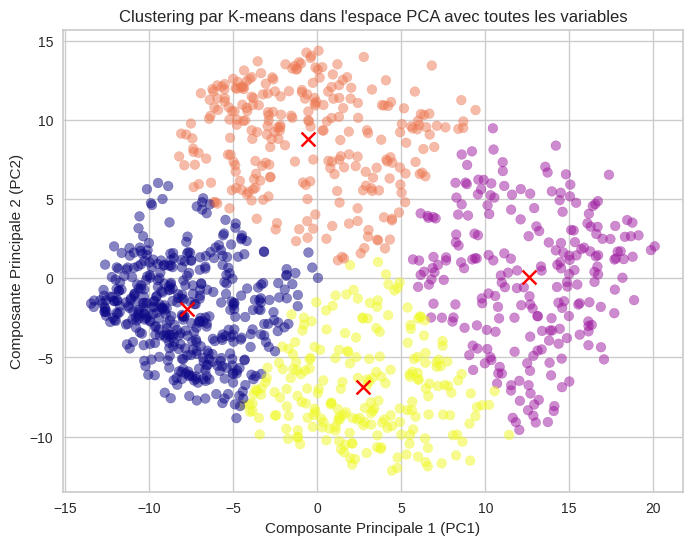

In [25]:
kmeans = KMeans(n_clusters=4,random_state=42)

cluster_km1=kmeans.fit_predict(new_variables)
labels = kmeans.labels_

# Visualiser les clusters dans l'espace des composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(loading_reduced[:,0], loading_reduced[:,1], c=labels, cmap='plasma', alpha=0.5)  # Points de dispersion colorés par les clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')  # Centres des clusters
plt.title('Clustering par K-means dans l\'espace PCA avec toutes les variables')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.grid(True)
plt.show()   


Classes size: [432 271 223 231]
Class (in the classif1 numbering): [0 2 3 1]



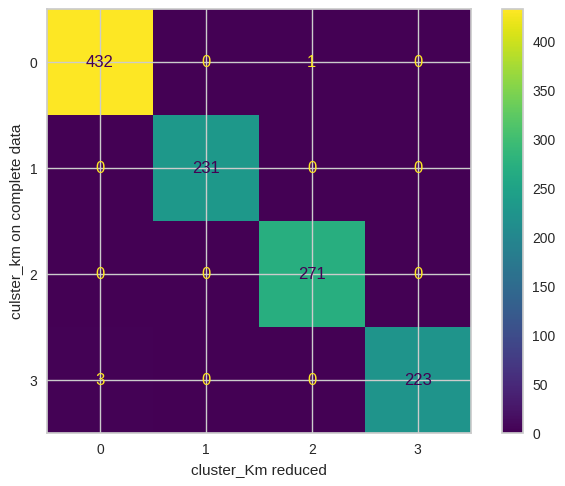

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters

cm, clusters_pca_sorted = matchClasses(cluster_km1 , cluster_km)

ConfusionMatrixDisplay(cm).plot()

plt.xlabel('cluster_Km reduced')
plt.ylabel('culster_km on complete data')
plt.show()

# III. CAH

In [27]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

## III.1 Comparaison des Linkages

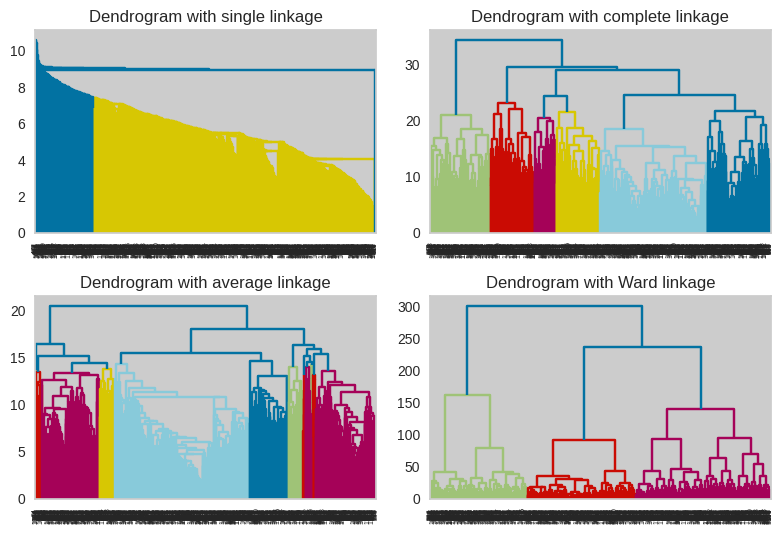

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
linkage_matrix = linkage(loading_reduced, method='single')
dendrogram(linkage_matrix)
plt.title("Dendrogram with single linkage")

plt.subplot(2,2,2)
linkage_matrix = linkage(loading_reduced, method='complete')
dendrogram(linkage_matrix)
plt.title("Dendrogram with complete linkage")

plt.subplot(2,2,3)
linkage_matrix = linkage(loading_reduced, method='average')
dendrogram(linkage_matrix)
plt.title("Dendrogram with average linkage")

plt.subplot(2,2,4)
linkage_matrix = linkage(loading_reduced, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram with Ward linkage")

plt.tight_layout()
plt.show()

#### Nous avons un amas de données assez globulaire, donc il est normal que le dendrogramme avec la méthode de Ward nous donne des clusters assez proches en nombre de ceux que nous avions choisis précédemment. Nous déciderons de sélectionner 4 clusters  de rester cohérent avec nos choix prrécédents.

## III.2 Choix du nombre de clusters 

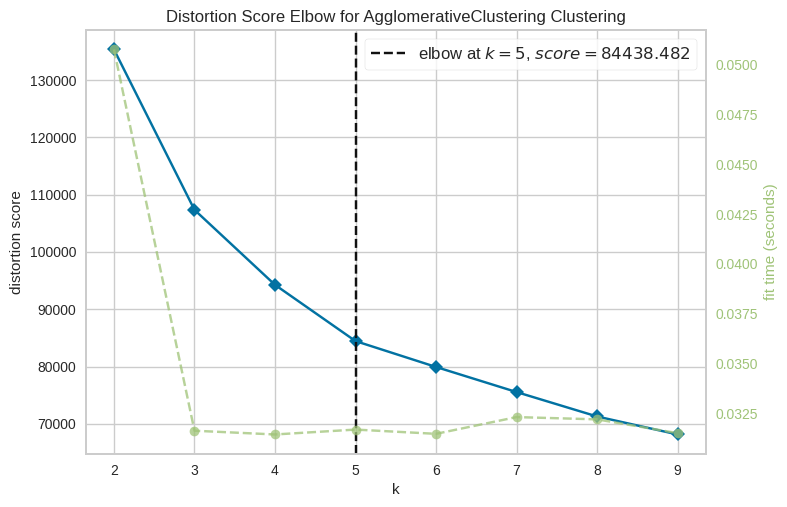

In [29]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(2,10))

visualizer.fit(loading_reduced)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

### On utilise la technique du coude pour visualiser le nombre de clusterà choisir.Visiblement on choisit un nombre de cluster de 5 avec cette méthode.Ce qui correspond à la plus grande hauteur observée entre deux classes du dendogramme.

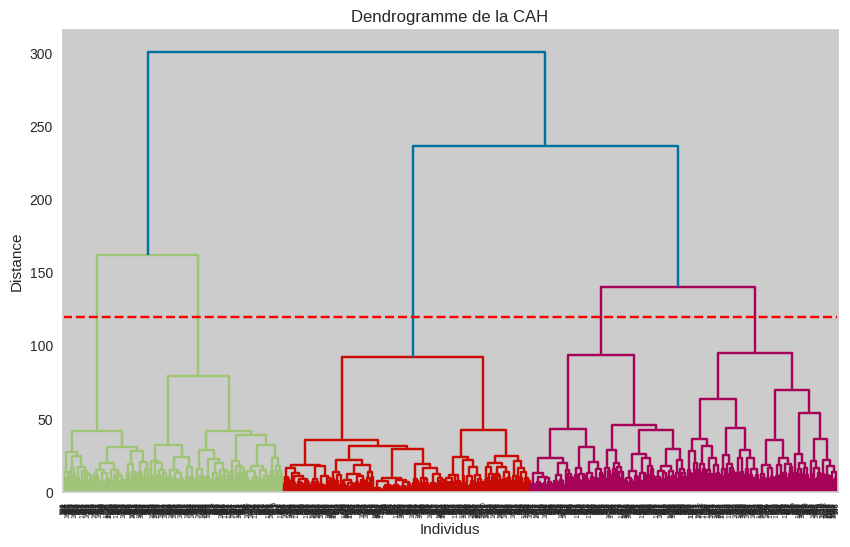

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calculer la matrice de liaison (linkage matrix) en utilisant la méthode ward
Z = linkage(loading_reduced, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(Z)
K=.4*(ac.distances_[-5]+ac.distances_[-5+1])

# Tracer une ligne horizontale pour marquer la plus grande hauteur
plt.axhline(y=120, c='red', linestyle='--', label='Plus grande hauteur')
plt.title("Dendrogramme de la CAH")
plt.xlabel("Individus")
plt.ylabel("Distance")
plt.show()



## III.3 CAH - Graphe des individus en 2D

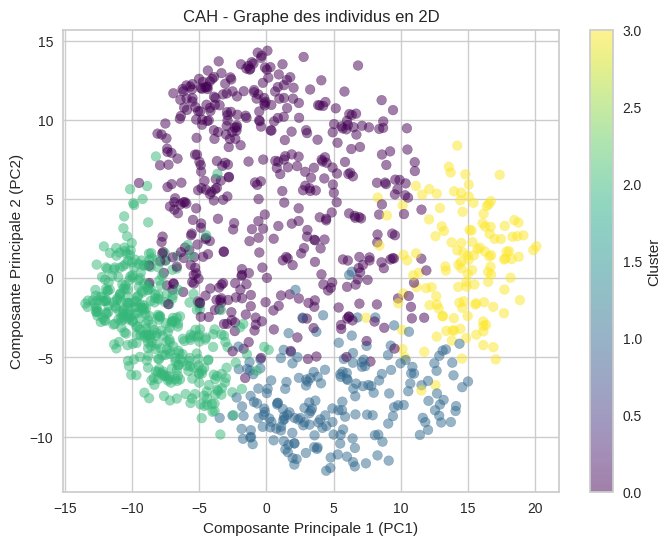

In [31]:

# Initialiser le modèle CAH
nombre_clusters = 4 # Nombre de clusters choisi
cah = AgglomerativeClustering(n_clusters=nombre_clusters)

# Ajuster le modèle sur vos données

clusters_ac = cah.fit_predict(loading_reduced)
# Obtenir les étiquettes de cluster pour chaque point de données
labelsc = cah.labels_

# Tracer le graphe des individus en 2D avec les couleurs des clusters
plt.figure(figsize=(8, 6))
plt.scatter(loading_reduced[:,0], loading_reduced[:,1], c=labelsc, cmap='viridis', alpha=0.5)
plt.title('CAH - Graphe des individus en 2D')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()





In [33]:
cm, clusters_pca_sorted = matchClasses(cluster_km1 , clusters_ac)

ConfusionMatrixDisplay(cm).plot()

plt.xlabel('cluster_Km reduced')
plt.ylabel('culster_ac)
plt.show()

SyntaxError: unterminated string literal (detected at line 6) (1588045155.py, line 6)

#### Sur le graphe on constate que les clusters n'ont pas la même taille , de plus ils sont assez différents de ceux obtenus avec la méthode du K-Means.Comme l'indique aussi la matrice de confusion.Ici on va préférer la méthode du KMEANS qui sépare beaucoup mieux les cluster et leur fournit une taille à peu près similaire

# IV. GMM

In [34]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score  ,silhouette_samples

## IV.1 Choix du nombre de clusters avec Silhouette score

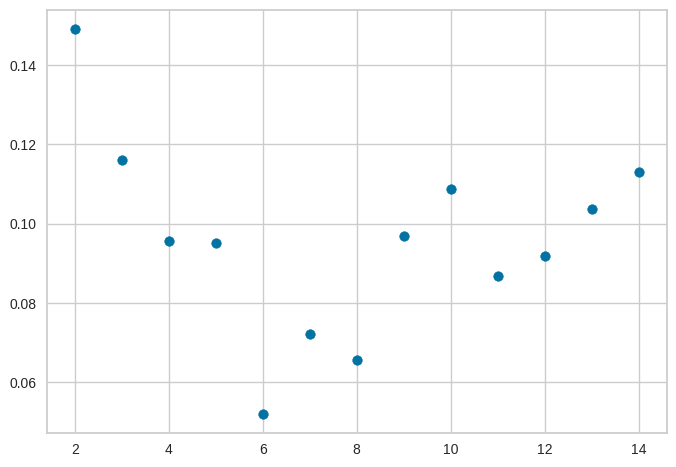

In [35]:
k_max = 15

silhouette = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    clusters_gmm = gmm.fit_predict(loading_reduced)
    silhouette.append( silhouette_score(loading_reduced, clusters_gmm, metric='euclidean') )
silhouette = np.array(silhouette)

plt.scatter(range(2, k_max), silhouette)
plt.show()

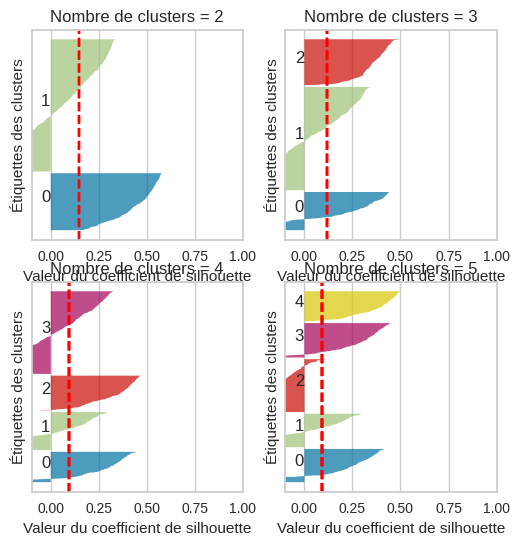

In [36]:

# Créez une figure et des sous-graphiques
fig, ax = plt.subplots(2, 2, figsize=(6, 6))

# Itération sur différents nombres de composants
for k in range(2, 6):
    # Créez et ajustez le modèle de mélange gaussien
    gmm = GaussianMixture(n_components=k, random_state=0)
    cluster_labels = gmm.fit_predict(loading_reduced)
    
    # Calcul des coefficients de silhouette
    silhouette_avg = silhouette_score(loading_reduced, cluster_labels)
    sample_silhouette_values = silhouette_samples(loading_reduced, cluster_labels)
    
    # Tracer les coefficients de silhouette pour chaque échantillon
    y_lower = 10
    for i in range(k):
        # Sélectionnez les coefficients de silhouette pour le cluster actuel
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Remplir le graphique avec les coefficients de silhouette du cluster actuel
        ax[(k-2)//2, (k-2)%2].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7)
        
        # Mettre en évidence la silhouette moyenne du cluster
        ax[(k-2)//2, (k-2)%2].axvline(x=silhouette_avg, color="red", linestyle="--")
        
        # Étiqueter le numéro de cluster à la droite du graphique
        ax[(k-2)//2, (k-2)%2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Calculer la nouvelle position de y_lower pour le prochain graphique
        y_lower = y_upper + 10  # 10 pour l'espace blanc
    
    # Étiqueter les axes et le titre
    ax[(k-2)//2, (k-2)%2].set_title(f'Nombre de clusters = {k}')
    ax[(k-2)//2, (k-2)%2].set_xlabel("Valeur du coefficient de silhouette")
    ax[(k-2)//2, (k-2)%2].set_ylabel("Étiquettes des clusters")
    ax[(k-2)//2, (k-2)%2].set_xlim([-0.1, 1])
    
    # Effacer les axes yticks
    ax[(k-2)//2, (k-2)%2].set_yticks([])
    
plt.show()


## IV.2 GMM - Graphe des individus en 2D

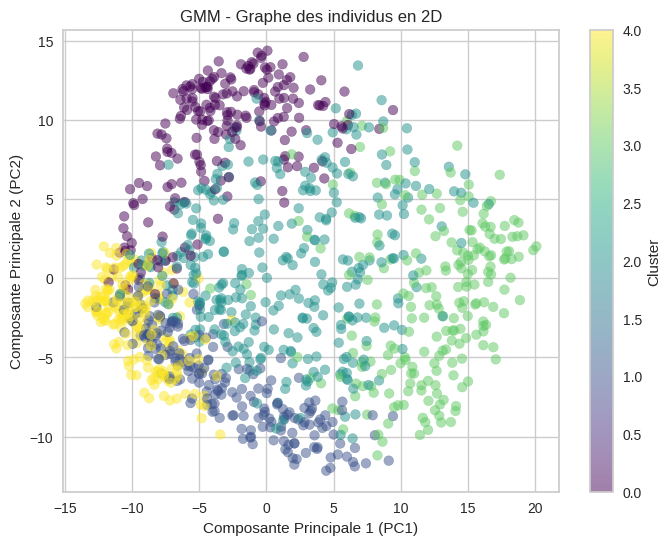

In [38]:

gm=GaussianMixture(n_components=5, random_state=0)
gm.fit(loading_reduced)
#labels_gm=gm.labels
cluster_gm=gm.predict(loading_reduced)


plt.figure(figsize=(8, 6))
plt.scatter(loading_reduced[:,0], loading_reduced[:,1], c=cluster_gm, cmap='viridis', alpha=0.5)
plt.title('GMM - Graphe des individus en 2D')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## IV.3-Comparaison entre le gmm et la méthode du K-Means

In [39]:
from sklearn.metrics import fowlkes_mallows_score, normalized_mutual_info_score

K = 5
n_run = 10

# --- #

fm = []
nmi = []
for i in range(n_run):
    clusters = KMeans(K).fit_predict(new_variables)
    fm.append(fowlkes_mallows_score(clusters, cluster_gm))
    nmi.append(normalized_mutual_info_score(clusters, cluster_gm))
fm = np.array(fm)
nmi = np.array(nmi)

# --- #

print("Results for K-means, applied on first three dimensions of PCA, over %i runs:" % n_run)
print(u"Fowlkes Mallows   : %f \u00B1 %f" % (fm.mean(), fm.std()))
print(u"Mutual Information: %f \u00B1 %f" % (nmi.mean(), nmi.std()))

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/i

Results for K-means, applied on first three dimensions of PCA, over 10 runs:
Fowlkes Mallows   : 0.440957 ± 0.003518
Mutual Information: 0.415277 ± 0.005551


In [40]:
loading.head()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758


In [43]:
loading.describe()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,0.403374,0.411060,0.414181,0.417564,0.419688,0.423928,0.422044,0.417737,0.386192,0.326969,...,0.348337,0.328506,0.313361,0.309060,0.317065,0.337031,0.356828,0.388599,0.395515,0.400812
std,0.336779,0.335624,0.336352,0.337126,0.331808,0.326221,0.323116,0.319156,0.303800,0.313735,...,0.340760,0.340334,0.337340,0.331927,0.324047,0.318342,0.319173,0.329533,0.335991,0.342851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095238,0.095238,0.098361,0.102564,0.111111,0.116279,0.116279,0.117647,0.114286,0.047619,...,0.052632,0.041667,0.040000,0.044444,0.052632,0.071429,0.080000,0.095238,0.090909,0.093750
50%,0.315789,0.340000,0.346154,0.352941,0.360000,0.370370,0.362069,0.360000,0.325000,0.217391,...,0.210526,0.170732,0.156250,0.147541,0.175000,0.208333,0.240000,0.288462,0.294118,0.302326
75%,0.696970,0.708333,0.708333,0.714286,0.708333,0.700000,0.705882,0.700000,0.636364,0.574468,...,0.660000,0.612903,0.557377,0.562500,0.555556,0.574468,0.615385,0.676471,0.678571,0.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
coord.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


In [59]:


# Step 1: Group columns by 4-hour intervals
columns_grouped = [loading.columns[i:i+4] for i in range(0, len(loading.columns), 4)]

# Step 2: Calculate the mean for each 4-hour interval
mean_by_interval = {}
for group in columns_grouped:
    mean_by_interval[group[0]] = loading[group].mean(axis=1)

# Step 3: Determine the modalities based on the mean of each interval
modalities = []
for interval, mean_values in mean_by_interval.items():
    modalities_interval = []
    for mean_value in mean_values:
        if mean_value < 0.25:
            modalities_interval.append("Déchargé")
        elif 0.25 <= mean_value < 0.5:
            modalities_interval.append("Moyennement déchargé")
        elif 0.5 <= mean_value < 0.75:
            modalities_interval.append("Moyennement chargé")
        else:
            modalities_interval.append("Chargé")
    modalities.append(modalities_interval)

# Create a DataFrame for modalities
modalities_df = pd.DataFrame(modalities, index=mean_by_interval.keys(), columns=loading.index)

# Transpose the DataFrame to have stations as rows and time intervals as columns
modalities_df = modalities_df.transpose()

# Now modalities_df contains the modalities for each station and time interval
modalities_df.head()


,Lun-00,Lun-04,Lun-08,Lun-12,Lun-16,Lun-20,Mar-00,Mar-04,Mar-08,Mar-12,...,Sam-08,Sam-12,Sam-16,Sam-20,Dim-00,Dim-04,Dim-08,Dim-12,Dim-16,Dim-20
1,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Moyennement déchargé,Moyennement chargé,Moyennement chargé,Déchargé,Déchargé,...,Moyennement déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé
2,Moyennement déchargé,Moyennement déchargé,Déchargé,Déchargé,Déchargé,Chargé,Chargé,Chargé,Moyennement déchargé,Déchargé,...,Chargé,Moyennement déchargé,Déchargé,Moyennement déchargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Déchargé,Déchargé,Moyennement déchargé
3,Déchargé,Déchargé,Déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement chargé,Chargé,...,Moyennement déchargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Moyennement déchargé,Déchargé,Moyennement déchargé
4,Chargé,Chargé,Chargé,Chargé,Moyennement chargé,Déchargé,Déchargé,Déchargé,Chargé,Chargé,...,Déchargé,Moyennement déchargé,Moyennement chargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement chargé,Chargé,Chargé,Chargé
5,Chargé,Moyennement chargé,Chargé,Chargé,Moyennement chargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement chargé,Chargé,...,Moyennement déchargé,Moyennement déchargé,Déchargé,Déchargé,Moyennement déchargé,Déchargé,Déchargé,Moyennement déchargé,Chargé,Moyennement chargé


In [65]:


# Renommer les colonnes
modalities_df = modalities_df.rename(columns={
    'Lun-00': 'Lundi 00h-04h',
    'Lun-04': 'Lundi 04h-08h',
    'Lun-08': 'Lundi 08h-12h',
    'Lun-12': 'Lundi 12h-16h',
    'Lun-16': 'Lundi 16h-20h',
    'Lun-20': 'Lundi 20h-00h',
    'Mar-00': 'Mardi 00h-04h',
    'Mar-04': 'Mardi 04h-08h',
    'Mar-08': 'Mardi 08h-12h',
    'Mar-12': 'Mardi 12h-16h',
    'Mar-16': 'Mardi 16h-20h',
    'Mar-20': 'Mardi 20h-00h',
    'Mer-00': 'Mercredi 00h-04h',
    'Mer-04': 'Mercredi 04h-08h',
    'Mer-08': 'Mercredi 08h-12h',
    'Mer-12': 'Mercredi 12h-16h',
    'Mer-16': 'Mercredi 16h-20h',
    'Mer-20': 'Mercredi 20h-00h',
    'Jeu-00': 'Jeudi 00h-04h',
    'Jeu-04': 'Jeudi 04h-08h',
    'Jeu-08': 'Jeudi 08h-12h',
    'Jeu-12': 'Jeudi 12h-16h',
    'Jeu-16': 'Jeudi 16h-20h',
    'Jeu-20': 'Jeudi 20h-00h',
    'Ven-00': 'Vendredi 00h-04h',
    'Ven-04': 'Vendredi 04h-08h',
    'Ven-08': 'Vendredi 08h-12h',
    'Ven-12': 'Vendredi 12h-16h',
    'Ven-16': 'Vendredi 16h-20h',
    'Ven-20': 'Vendredi 20h-00h',
    'Sam-00': 'Samedi 00h-04h',
    'Sam-04': 'Samedi 04h-08h',
    'Sam-08': 'Samedi 08h-12h',
    'Sam-12': 'Samedi 12h-16h',
    'Sam-16': 'Samedi 16h-20h',
    'Sam-20': 'Samedi 20h-00h',
    'Dim-00': 'Dimanche 00h-04h',
    'Dim-04': 'Dimanche 04h-08h',
    'Dim-08': 'Dimanche 08h-12h',
    'Dim-12': 'Dimanche 12h-16h',
    'Dim-16': 'Dimanche 16h-20h',
    'Dim-20': 'Dimanche 20h-00h'
})


In [66]:
modalities_df.head()

,Lundi 00h-04h,Lundi 04h-08h,Lundi 08h-12h,Lundi 12h-16h,Lundi 16h-20h,Lundi 20h-00h,Mardi 00h-04h,Mardi 04h-08h,Mardi 08h-12h,Mardi 12h-16h,...,Samedi 08h-12h,Samedi 12h-16h,Samedi 16h-20h,Samedi 20h-00h,Dimanche 00h-04h,Dimanche 04h-08h,Dimanche 08h-12h,Dimanche 12h-16h,Dimanche 16h-20h,Dimanche 20h-00h
1,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Moyennement déchargé,Moyennement chargé,Moyennement chargé,Déchargé,Déchargé,...,Moyennement déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé,Déchargé
2,Moyennement déchargé,Moyennement déchargé,Déchargé,Déchargé,Déchargé,Chargé,Chargé,Chargé,Moyennement déchargé,Déchargé,...,Chargé,Moyennement déchargé,Déchargé,Moyennement déchargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Déchargé,Déchargé,Moyennement déchargé
3,Déchargé,Déchargé,Déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement chargé,Chargé,...,Moyennement déchargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Moyennement chargé,Moyennement déchargé,Déchargé,Moyennement déchargé
4,Chargé,Chargé,Chargé,Chargé,Moyennement chargé,Déchargé,Déchargé,Déchargé,Chargé,Chargé,...,Déchargé,Moyennement déchargé,Moyennement chargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement chargé,Chargé,Chargé,Chargé
5,Chargé,Moyennement chargé,Chargé,Chargé,Moyennement chargé,Moyennement déchargé,Moyennement déchargé,Moyennement déchargé,Moyennement chargé,Chargé,...,Moyennement déchargé,Moyennement déchargé,Déchargé,Déchargé,Moyennement déchargé,Déchargé,Déchargé,Moyennement déchargé,Chargé,Moyennement chargé
